In [1]:
import matplotlib.pyplot as plt


def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [2]:
import matplotlib.pyplot as plt


def plot_comparison(
    original, filtered, title_filtered, title_original="Original", sz=(10, 8)
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=sz, sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

# 5. Image Filtering (Edge detection using sobel)

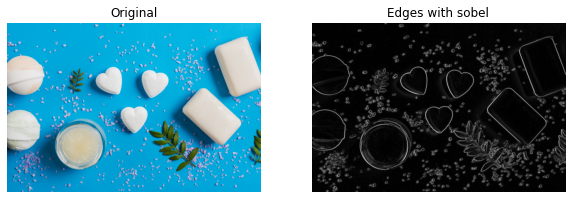

In [3]:
soaps_image = plt.imread("images/soap_image.jpg")
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
plot_comparison(soaps_image, edge_sobel, "Edges with sobel")
# show_image(soaps_image, "Original")
# show_image(edge_sobel, "Edges with Sobel")

## 6. Gaussian Smoothening

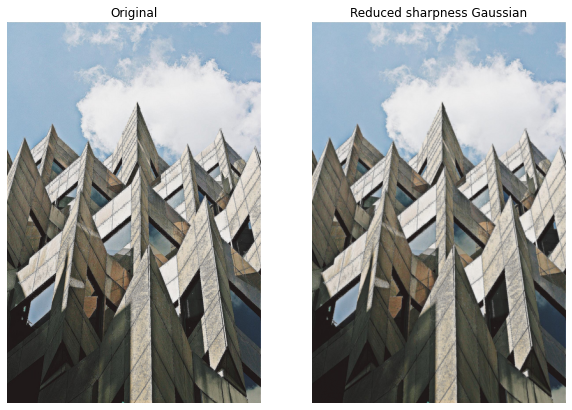

In [4]:
building_image = plt.imread("images/building_image.jpg")
# Import Gaussian filter
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
# show_image(building_image, "Original")
# show_image(gaussian_image, "Reduced sharpness Gaussian")
plot_comparison(building_image, gaussian_image, "Reduced sharpness Gaussian")

# 7. Contrast Enhancement
- Contrast stretching
- Histogram equalization
- Types:
    - Histogram equalization
    - Adaptive histogram equalization
    - Contrast Limited Adaptive Histogram Equalization (CLAHE)

# 7.1 Histogram equalization

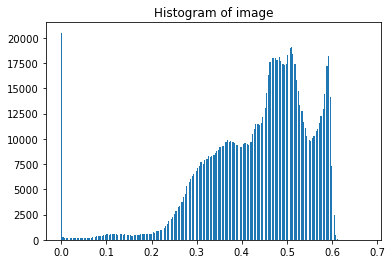

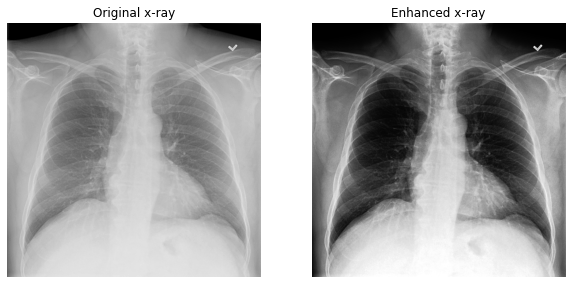

In [5]:
# Import the required module
from skimage import exposure

chest_xray_image = plt.imread("images/chest_xray_image.png")
# Show original x-ray image and its histogram
# show_image(chest_xray_image, "Original x-ray")

plt.title("Histogram of image")
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq = exposure.equalize_hist(chest_xray_image)

# Show the resulting image
# show_image(xray_image_eq, "Resulting image")
plot_comparison(chest_xray_image, xray_image_eq, "Enhanced x-ray", "Original x-ray")

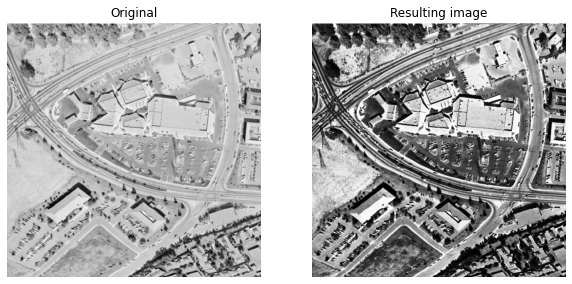

In [6]:
# Import the required module
from skimage import exposure

image_aerial = plt.imread("images/image_aerial.tiff")
# Use histogram equalization to improve the contrast
image_eq = exposure.equalize_hist(image_aerial)

# Show the original and resulting image
# show_image(image_aerial, "Original")
# show_image(image_eq, "Resulting image")
plot_comparison(image_aerial, image_eq, "Resulting image")

# 7.2 Adaptive equalization

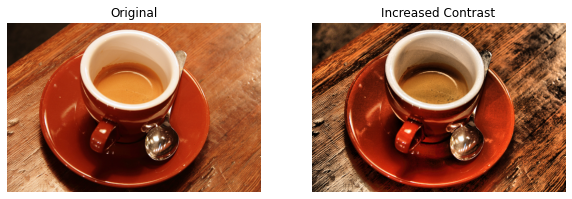

In [7]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
# show_image(original_image)
# show_image(adapthist_eq_image, "Increased Contrast")
plot_comparison(original_image, adapthist_eq_image, "Increased Contrast")

# 7.3 CLAHE (Contrastive Limited Adaptive Equalization)

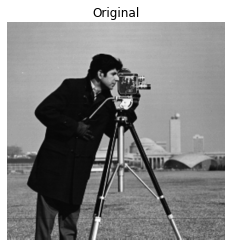

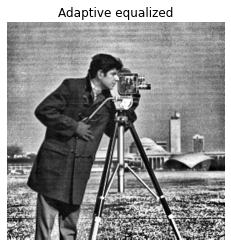

In [8]:
from skimage import exposure

image = data.camera()

# Apply adaptive Equalization
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Show original and result
show_image(image, "Original")
show_image(image_adapteq, "Adaptive equalized")

# 8. Transformations (Rotating, Rescaling, Resizing)
- Preparing images for classication Machine Learning models
- Optimization and compression ofimages
- Save images with same proportion

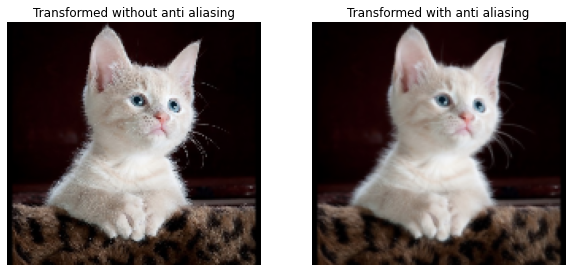

In [9]:
# Import the module and the rotate and rescale functions
image_cat = plt.imread("images/image_cat.jpg")
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(
    rotated_cat_image, 1 / 4, anti_aliasing=True, multichannel=True
)

# Rescale without anti aliasing
rescaled_without_aa = rescale(
    rotated_cat_image, 1 / 4, anti_aliasing=False, multichannel=True
)

# Show the resulting images
# show_image(rescaled_with_aa, "Transformed with anti aliasing")
# show_image(rescaled_without_aa, "Transformed without anti aliasing")
plot_comparison(
    rescaled_without_aa,
    rescaled_with_aa,
    "Transformed with anti aliasing",
    "Transformed without anti aliasing",
)

Original image shape:(423, 640, 3)
 Resized image shape:(211, 320, 3)


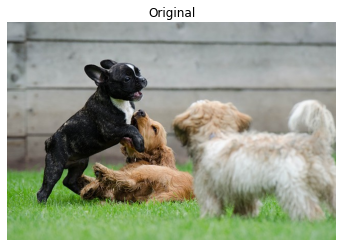

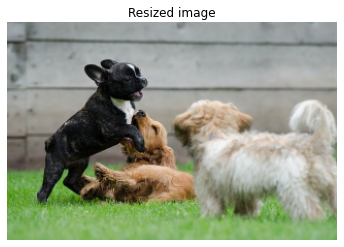

In [10]:
# Import the module and function
from skimage.transform import resize

dogs_banner = plt.imread("images/dogs_banner.jpg")
# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)
print(
    "Original image shape:{}\n Resized image shape:{}".format(
        dogs_banner.shape, image_resized.shape
    )
)
# Show the original and rotated image
show_image(dogs_banner, "Original")
show_image(image_resized, "Resized image")

# 9. Morphology
- For binary and grayscale images only
- **Morphological operations:**
    - Dilation (Adding boundary pixels)
    - Erosion (Removing boundary pixels)

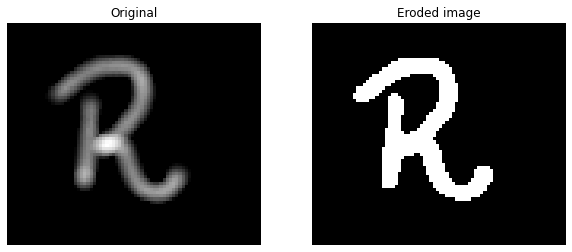

In [11]:
# Import the morphology module
from skimage import morphology

upper_r_image = plt.imread("images/upper_r_image.png")
upper_r_image = color.rgb2gray(upper_r_image)
# Obtain the eroded shape
eroded_image_shape = morphology.binary_erosion(upper_r_image)

# See results
# show_image(upper_r_image, "Original")
# show_image(eroded_image_shape, "Eroded image")
plot_comparison(upper_r_image, eroded_image_shape, "Eroded image")

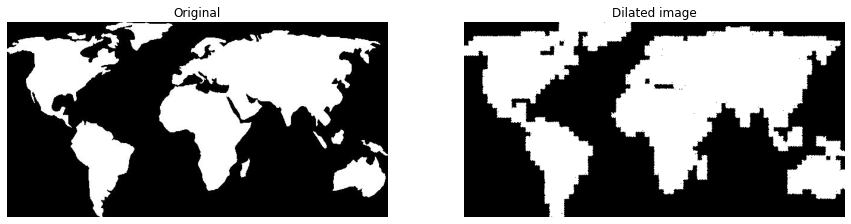

In [12]:
# Import the module
from skimage import morphology

world_image = plt.imread("images/world_image.jpg")
# Obtain the dilated image
dilated_image = morphology.binary_dilation(world_image)

# See results
# show_image(world_image, "Original")
# show_image(dilated_image, "Dilated image")
plot_comparison(world_image, dilated_image, "Dilated image", sz=(15, 15))